# ODMAC++ Data Plotter

## Imports

In [64]:
import csv, os
import matplotlib.pyplot as plt

## Read data from CSV

In [65]:
FILE_NAME = "realdata_90d_40000b_odmacpp_gb_90sw"

data_labels  = []
data_indices = []
data_values  = {}

folder_prefix = "../output/"
file_path = folder_prefix + FILE_NAME + '.csv'
with open(file_path) as csv_file:
    rows = csv.reader(csv_file, delimiter=';')
    title = True
    for row in rows:

        # initialize data labels & indices
        if title:
            c = 0
            for col_label in row:
                if not(col_label in data_values):
                    data_values[col_label] = []

                data_labels.append(col_label)
                data_indices.append(len(data_values[col_label]))
                data_values[col_label].append([])
                c += 1

            title = False
            continue

        # add new data
        c = 0
        for col_value in row:
            label = data_labels[c]
            index = data_indices[c]
            data_values[label][index].append(float(col_value))
            c += 1

## Plot Simulation Data

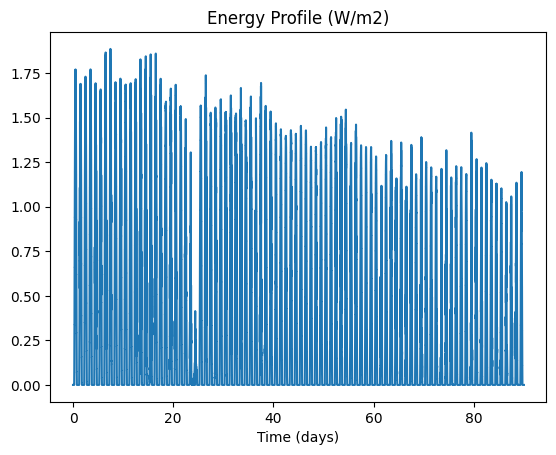

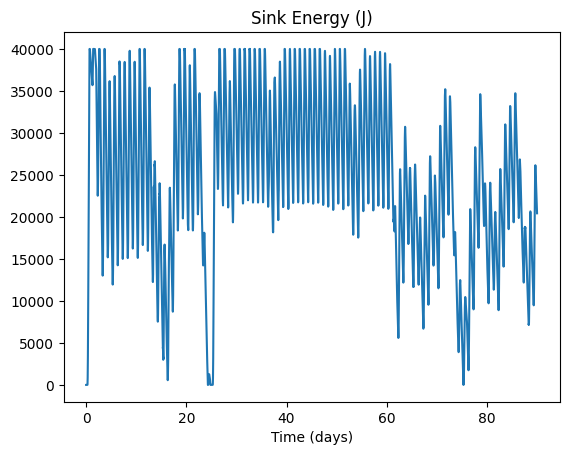

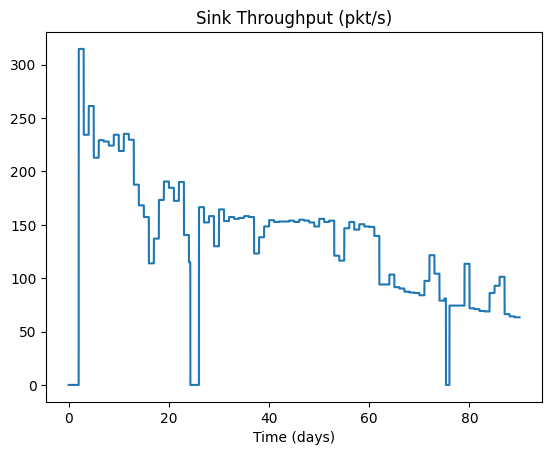

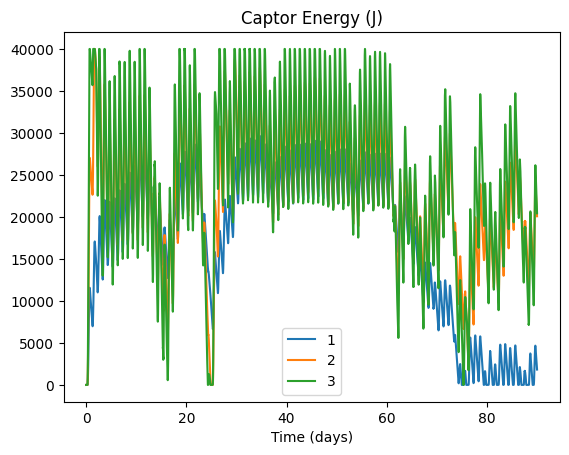

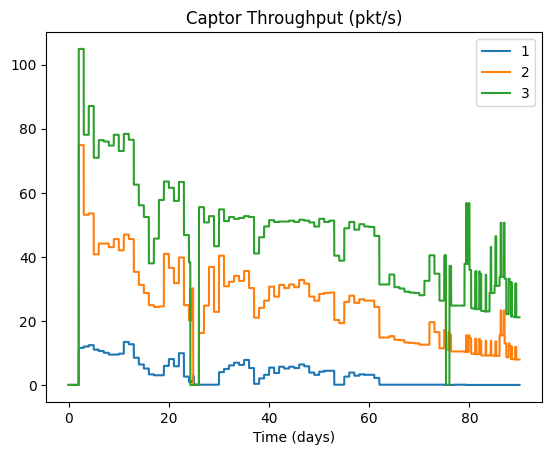

In [66]:
SHOWN             = -1 # amount of points/time steps to plot, -1 for everything
SIZE              = 1
TIME_LABEL        = 'Time (days)'
IGNORED_VARIABLES = [TIME_LABEL, 'Frequency'] # Ignored data

def is_ignored(key):
    for ignored in IGNORED_VARIABLES:
        if ignored in key:
            return True
    return False

T = data_values[TIME_LABEL][0][:SHOWN]
for key, lists in data_values.items():

    # Don't print ignored variables
    if is_ignored(key):
        c += 1
        continue

    plt.clf()

    c = 0
    for Y in lists:
        Y = Y[:SHOWN]
        plt.plot(T, Y, label=str(c + 1))
        c += 1

    plt.title(key)
    plt.xlabel('Time (days)')
    if len(lists) > 1:
        plt.legend()
    plt.show()

## Throughput w.r.t. exposure

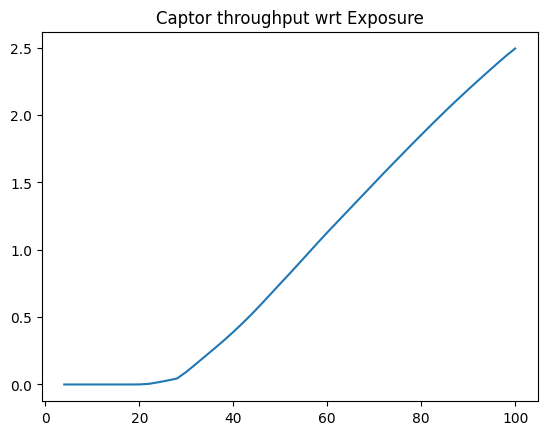

In [67]:
FILE_NAME = "throughput_wrt_exposure"

exposure = []
thrghput = []

folder_prefix = "../output/"
file_path = folder_prefix + FILE_NAME + '.csv'
with open(file_path) as csv_file:
    rows = csv.reader(csv_file, delimiter=';')
    title = True
    for row in rows:
        if title:
                title = False
                continue

        exposure.append(float(row[0]))
        thrghput.append(float(row[1]) / 1e7)

plt.plot(exposure, thrghput)
plt.title('Captor throughput wrt Exposure')
plt.ylegend()
plt.show()